# STOCK ANALYSIS PROJECT
## Data visualization and analysis

## I.Introduction
In today's dynamic financial landscape, understanding stock market behavior is paramount for informed decision-making. This essay presents findings from a comprehensive analysis of financial datasets, focusing on close prices and returns of major banking institutions. Through meticulous data processing and exploratory data analysis (EDA), we aim to unearth valuable insights to guide strategic investment decisions and risk management strategies.
Our analysis relies on a robust dataset comprising historical stock market data from leading banking institutions. This dataset, meticulously curated for accuracy and reliability, encompasses variables such as close prices and returns. Rigorous data processing methodologies ensure the integrity and consistency of our analysis.
Close price analysis forms the cornerstone of our investigation, offering a comprehensive view of market trends. Descriptive statistics, maximum close price analysis, and trend analysis provide insights into market dynamics. By contextualizing close price fluctuations within the 2008 Economic Crisis, we gain invaluable insights into market resilience and vulnerability across major banks such as Bank of America, Citigroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo. Additionally, correlation analysis between stocks' close prices uncovers market interdependencies and potential investment opportunities.
Returns analysis complements our understanding by offering insights into risk and performance. Through descriptive statistics and trend analysis, we identify patterns and outliers, shedding light on the dispersion of returns among banks during pivotal years like 2008 and 2015. Correlation analysis between bank stocks' returns further enriches our understanding of market dynamics and systemic risks.
Optional visualizations, including candle plot visualization and simple moving averages (SMAs) visualization, serve as powerful tools for intuitively communicating complex data patterns and trends, enhancing comprehension and decision-making processes.
In conclusion, our finance data analysis provides critical insights into stock market behavior within the banking sector. By leveraging advanced data analysis techniques and visualization tools, we empower stakeholders with actionable insights to inform investment strategies and risk management practices. These findings contribute to a deeper understanding of market dynamics, enabling stakeholders to navigate the financial landscape with confidence and foresight.

## II.Data

### 2.3. Data processing

In [ ]:
import pandas as pd
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
start=datetime.datetime(2006,1,1)
end= datetime.datetime(2016,1,1)
#Bank_of_America
BAC=yf.download(tickers= 'BAC', start=start, end=end, interval='1d')
#Citigroup
C=yf.download(tickers= 'C', start=start, end=end, interval='1d')
#Goldman_Sachs
GS=yf.download(tickers= 'GS', start=start, end=end, interval='1d')
#JPMorgan_Chase
JPM=yf.download(tickers= 'JPM', start=start, end=end, interval='1d')
#Morgan_Stanley
MS=yf.download(tickers= 'MS', start=start, end=end, interval='1d')
#Wells_Fargo
WFC=yf.download(tickers= 'WFC', start=start, end=end, interval='1d')
tickers=['BAC', 'C', 'GS','JPM','MS','WFC']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC], keys= tickers, axis=1)
bank_stocks=round(bank_stocks,2)
bank_stocks.head()

BAC                                               C         \
             Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                       
2006-01-03  46.92  47.18  46.15  47.08     31.94  16296700  490.0  493.8   
2006-01-04  47.00  47.24  46.45  46.58     31.60  17757900  488.6  491.0   
2006-01-05  46.58  46.83  46.32  46.64     31.65  14970700  484.4  487.8   
2006-01-06  46.80  46.91  46.35  46.57     31.60  12599800  488.8  489.0   
2006-01-09  46.72  46.97  46.36  46.60     31.62  15619400  486.0  487.4   

                          ...     MS                              WFC         \
              Low  Close  ...    Low  Close Adj Close   Volume   Open   High   
Date                      ...                                                  
2006-01-03  481.1  492.9  ...  56.74  58.31     33.26  5377000  31.60  31.98   
2006-01-04  483.5  483.8  ...  58.35  58.35     33.28  7977800  31.80  31.82   
2006-01-05  484.0  486.2  ...  58.02  58.51     33.37  5778000  31.50  31.56   
2006-01-06  482.0  486.2  ...  58.05  58.57     33.41  6889800  31.58  31.77   
2006-01-09  483.0  483.9  ...  58.62  59.19     33.76  4144500  31.67  31.83   

                                              
              Low  Close Adj Close    Volume  
Date                                          
2006-01-03  31.19  31.90     19.23  11016400  
2006-01-04  31.36  31.53     19.01  10870000  
2006-01-05  31.31  31.50     18.99  10158000  
2006-01-06  31.39  31.68     19.10   8403800  
2006-01-09  31.56  31.67     19.10   5619600  

[5 rows x 36 columns]

In [ ]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.to_csv('bank_stocks.csv')
bank_stocks.head()

Bank Ticker    BAC                                               C         \
Stock Info    Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08     31.94  16296700  490.0  493.8   
2006-01-04   47.00  47.24  46.45  46.58     31.60  17757900  488.6  491.0   
2006-01-05   46.58  46.83  46.32  46.64     31.65  14970700  484.4  487.8   
2006-01-06   46.80  46.91  46.35  46.57     31.60  12599800  488.8  489.0   
2006-01-09   46.72  46.97  46.36  46.60     31.62  15619400  486.0  487.4   

Bank Ticker                ...     MS                              WFC         \
Stock Info     Low  Close  ...    Low  Close Adj Close   Volume   Open   High   
Date                       ...                                                  
2006-01-03   481.1  492.9  ...  56.74  58.31     33.26  5377000  31.60  31.98   
2006-01-04   483.5  483.8  ...  58.35  58.35     33.28  7977800  31.80  31.82   
2006-01-05   484.0  486.2  ...  58.02  58.51     33.37  5778000  31.50  31.56   
2006-01-06   482.0  486.2  ...  58.05  58.57     33.41  6889800  31.58  31.77   
2006-01-09   483.0  483.9  ...  58.62  59.19     33.76  4144500  31.67  31.83   

Bank Ticker                                    
Stock Info     Low  Close Adj Close    Volume  
Date                                           
2006-01-03   31.19  31.90     19.23  11016400  
2006-01-04   31.36  31.53     19.01  10870000  
2006-01-05   31.31  31.50     18.99  10158000  
2006-01-06   31.39  31.68     19.10   8403800  
2006-01-09   31.56  31.67     19.10   5619600  

[5 rows x 36 columns]

In [ ]:
returns = pd.DataFrame()

In [ ]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [ ]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000316


## EDA

## 3.1. Close price analysis

### 3.1.1. Descriptive Statistics

In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').describe()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,22.174660,145.388713,158.481482,45.985546,36.006198,35.598319
std,15.304887,177.398413,35.635574,9.839554,18.669383,10.012566
min,3.140000,10.200000,52.000000,15.900000,9.200000,8.120000
25%,12.270000,39.400000,138.180000,39.710000,23.870000,28.490000
50%,15.790000,49.390000,161.980000,44.590000,30.340000,33.500000
75%,32.630000,196.900000,182.120000,52.540000,40.210000,41.220000
max,54.900000,564.100000,247.920000,70.080000,89.300000,58.520000


### 3.1.2. Max close price analysis

In [ ]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [ ]:
dates = bank_stocks.xs(key='Close', axis=1, level='Stock Info').idxmax()
max_values = bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()
max_value_and_date = pd.concat([max_values, dates], axis=1)
max_value_and_date.columns = ['Max Close', 'Date']
max_value_and_date

,Max Close,Date
Bank Ticker,,
BAC,54.90,2006-11-16
C,564.10,2006-12-27
GS,247.92,2007-10-31
JPM,70.08,2015-07-22
MS,89.30,2007-06-14
WFC,58.52,2015-07-22


### 3.1.3. Close price trends analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

<Axes: xlabel='Date'>

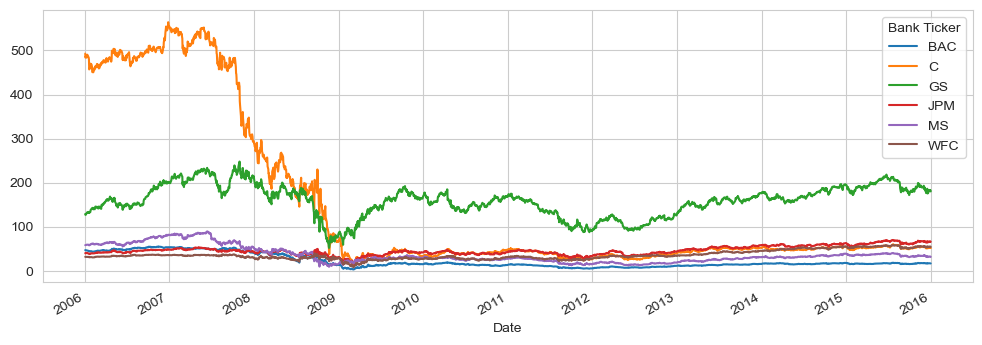

In [ ]:
bank_stocks.xs('Close', level='Stock Info', axis= 1).plot(figsize=(12,4), label=tick)

### 3.1.4. Fluctuations in close prices trends in 2008

#### 3.1.4.1. Bank of America (BAC)

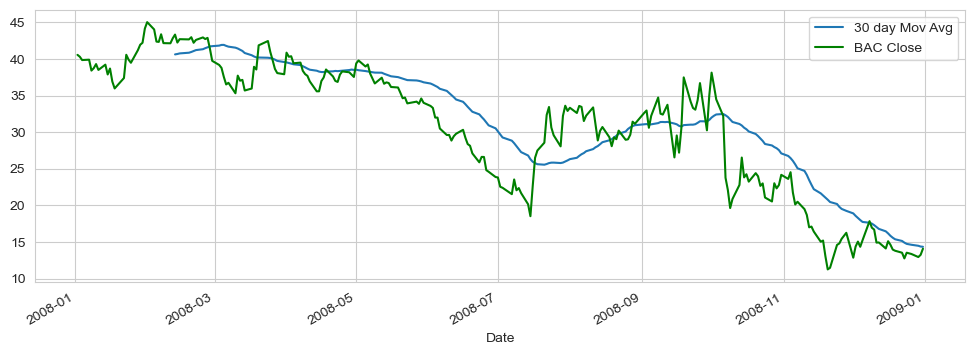

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close',color='green')
plt.legend()

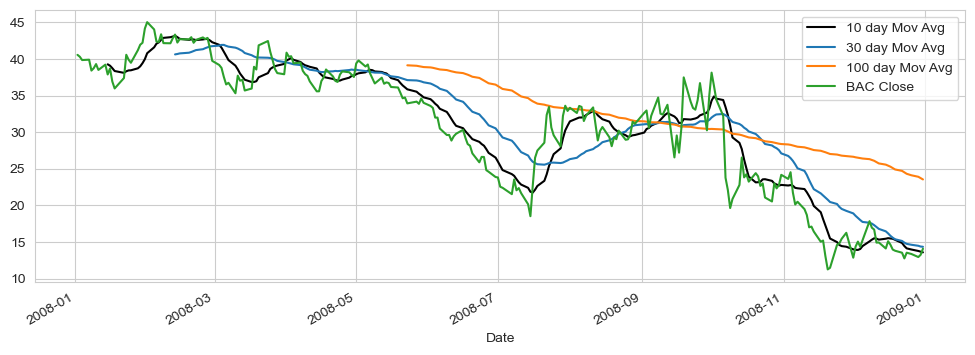

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

#### 3.4.1.2. Citigroup

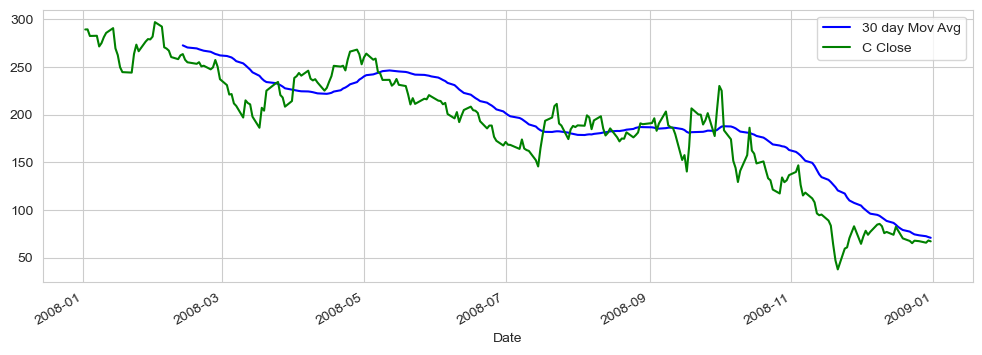

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C Close',color='green')
plt.legend()

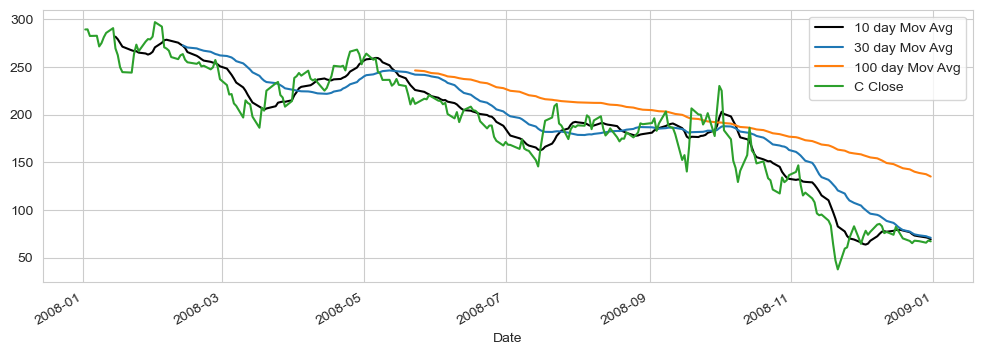

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['C']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='C Close')
plt.legend()

#### 3.1.4.3. Goldman Sachs

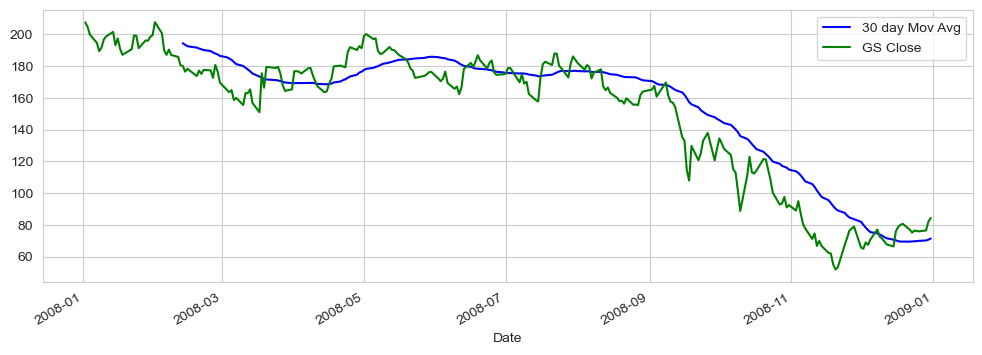

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS Close',color='green')
plt.legend()

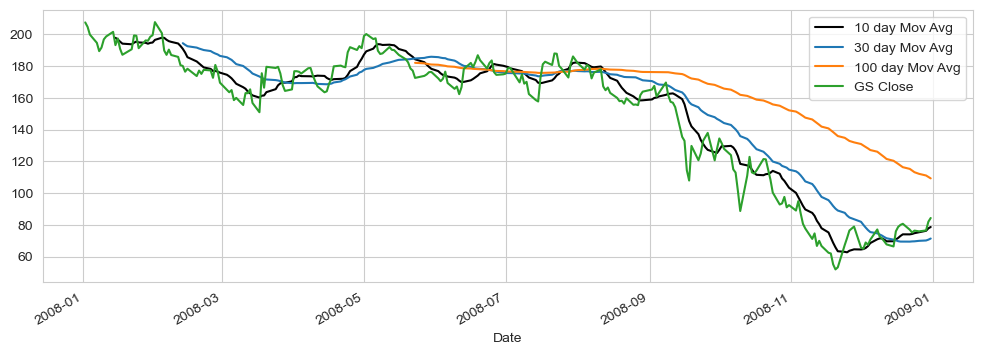

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['GS']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='GS Close')
plt.legend()

#### 3.1.4.4. JPMorgan Chase

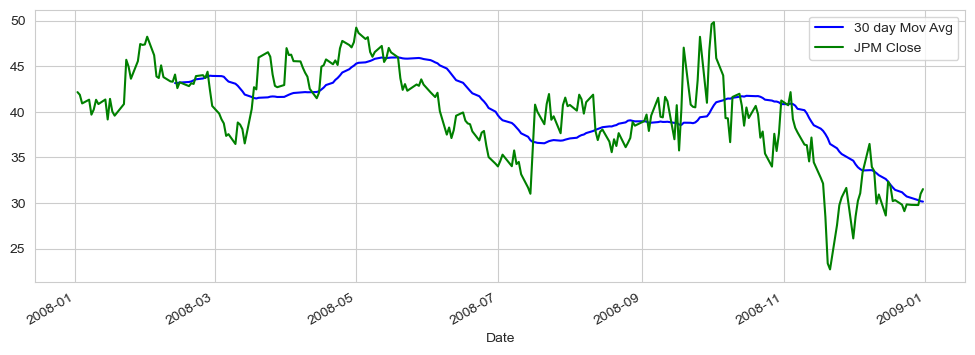

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='JPM Close',color='green')
plt.legend()

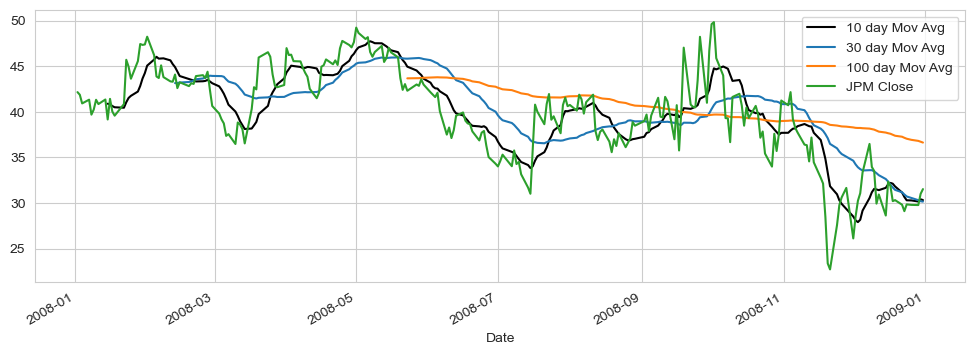

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['JPM']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='JPM Close')
plt.legend()

#### 3.1.4.4. Morgan Stanley

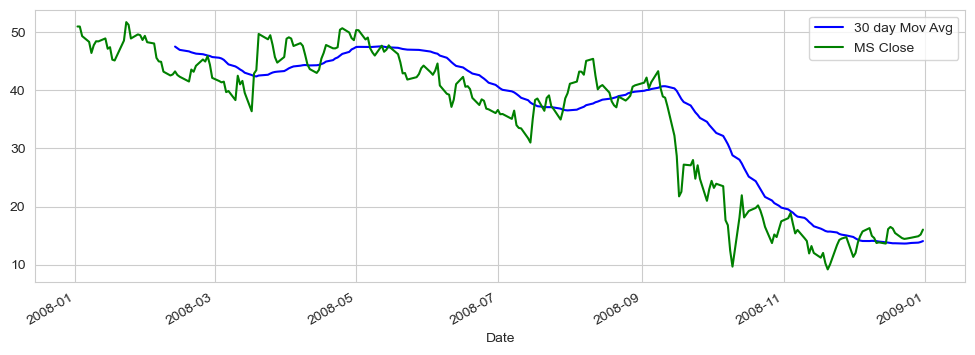

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='MS Close',color='green')
plt.legend()

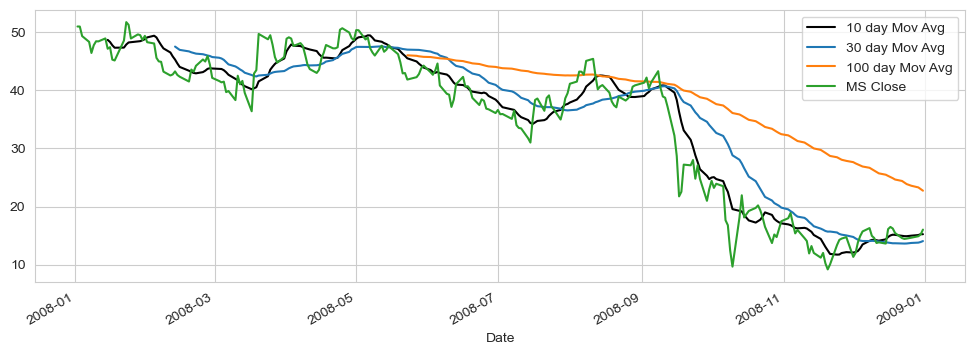

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['MS']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='MS Close')
plt.legend()

#### 3.1.4.4. Wells Fargo

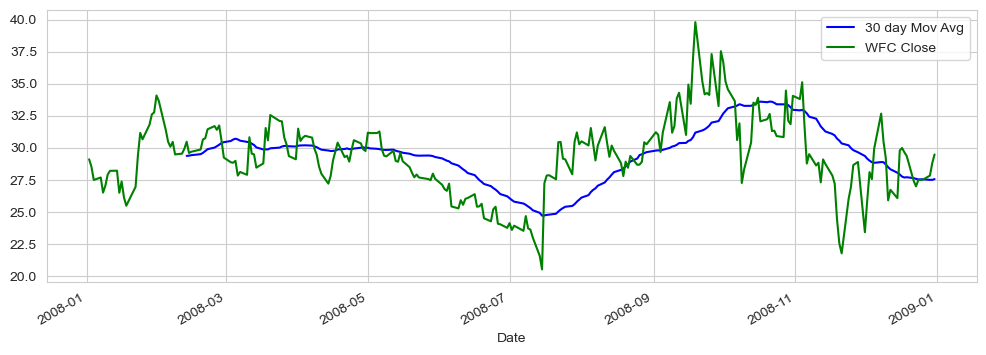

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg',color='blue')
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='WFC Close',color='green')
plt.legend()

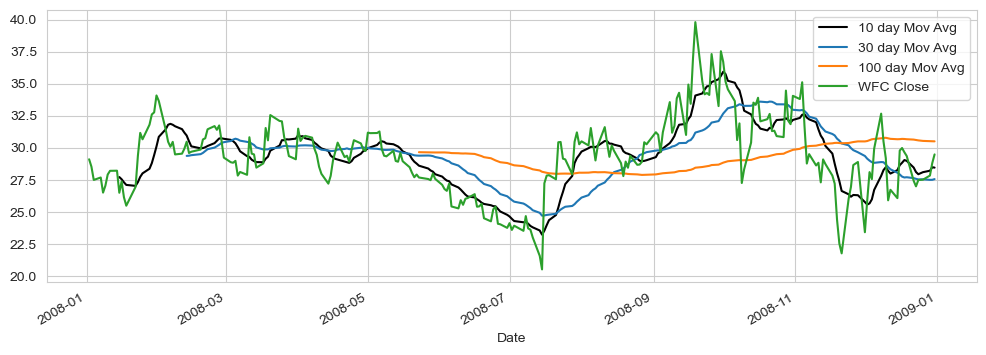

In [ ]:
plt.figure(figsize=(12,4))
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=10).mean().plot(label='10 day Mov Avg', color='black')
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=100).mean().plot(label='100 day Mov Avg')
bank_stocks['WFC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='WFC Close')
plt.legend()

### 3.1.5. Correlation between the stocks' Close Price.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

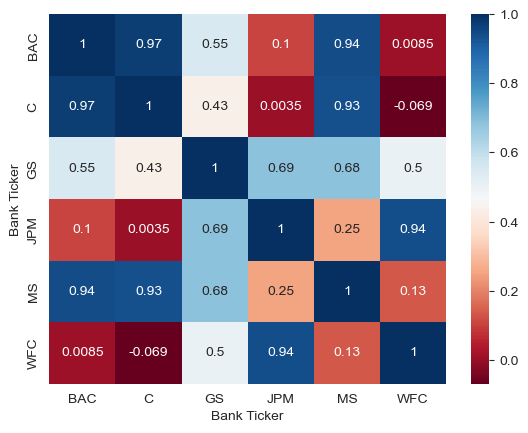

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True,cmap='RdBu')

<Figure size 1200x800 with 0 Axes>

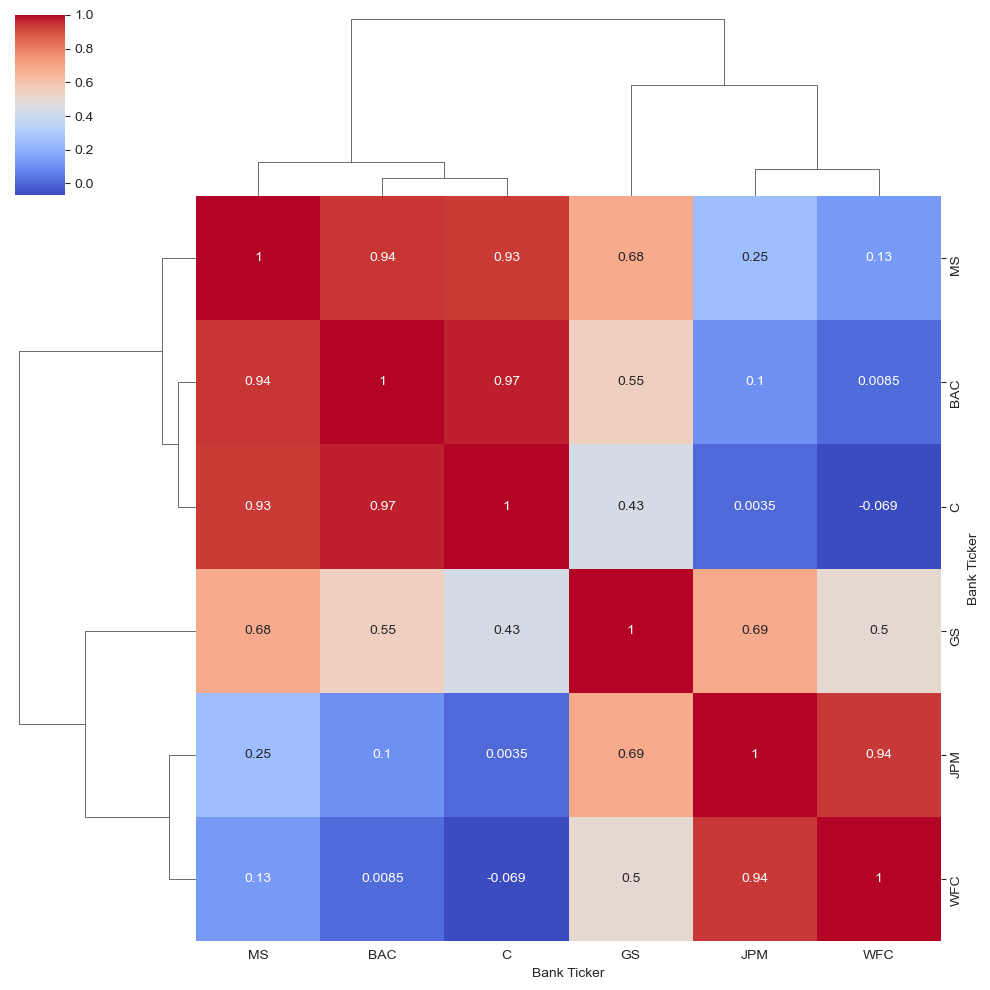

In [ ]:
plt.figure(figsize=(12,8))
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

### 3.2. Returns Analysis
#### 3.2.1. Descriptive Statistics

In [ ]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000258,-0.000157,0.000452,0.000575,0.000423,0.000657
std,0.036647,0.038672,0.025390,0.027667,0.037819,0.030238
min,-0.289694,-0.390244,-0.189596,-0.207274,-0.258929,-0.238223
25%,-0.011367,-0.011182,-0.010185,-0.009946,-0.012397,-0.008664
50%,0.000000,-0.000209,0.000368,0.000164,0.000254,0.000000
75%,0.010751,0.010751,0.011004,0.010022,0.012504,0.008844
max,0.352691,0.578249,0.264678,0.250967,0.869835,0.327645


In [ ]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [ ]:
returns.loc['2015-01-02':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### 3.2.2. Returns’ trends and dispersion among banks in the year: 2008 and 2015.
##### 3.2.2.1. Bank of America


<Axes: xlabel='BAC Return', ylabel='Density'>

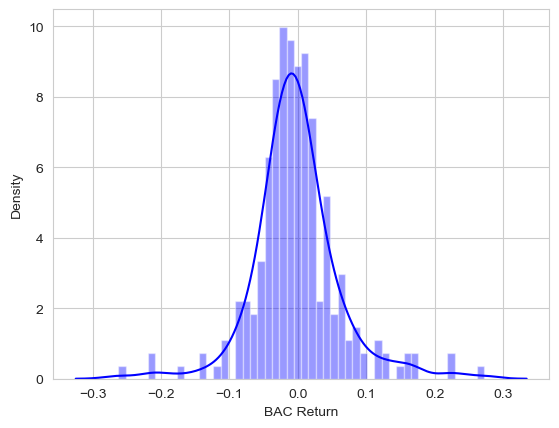

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['BAC Return'], color='blue', bins=50)

<Axes: xlabel='BAC Return', ylabel='Density'>

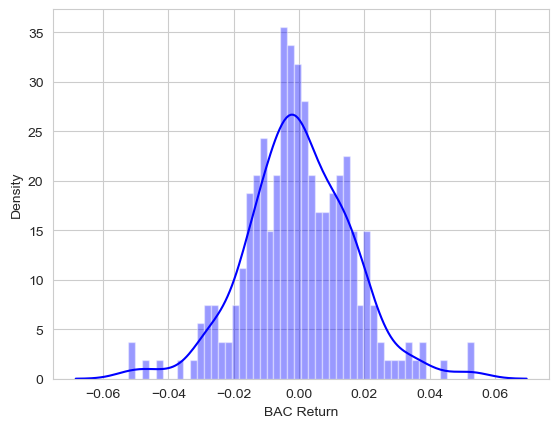

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['BAC Return'], color='blue', bins=50)

##### 3.2.2.2. Citigroup (C)

<Axes: xlabel='C Return', ylabel='Density'>

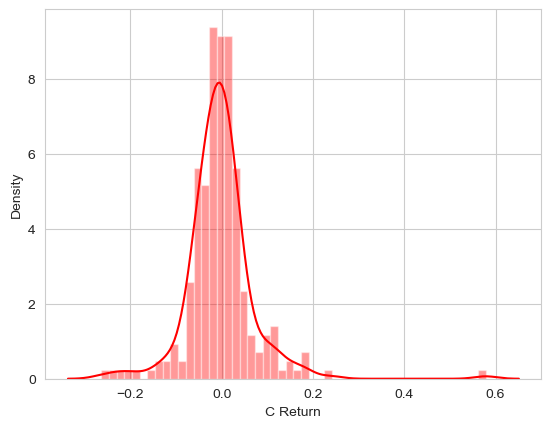

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

<Axes: xlabel='C Return', ylabel='Density'>

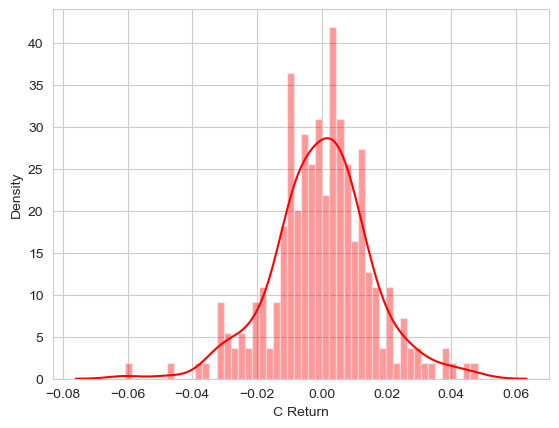

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'], color='red', bins=50)

##### 3.2.2.3. GS

<Axes: xlabel='GS Return', ylabel='Density'>

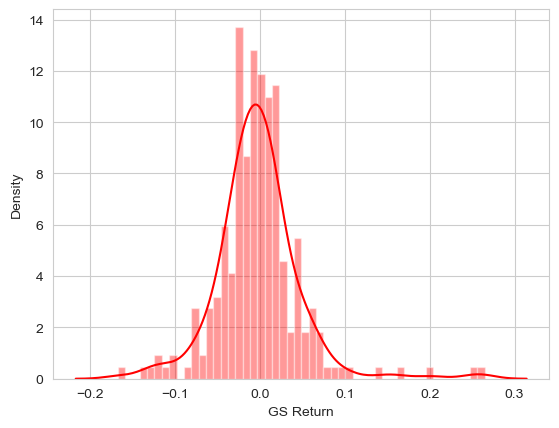

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['GS Return'], color='red', bins=50)

<Axes: xlabel='GS Return', ylabel='Density'>

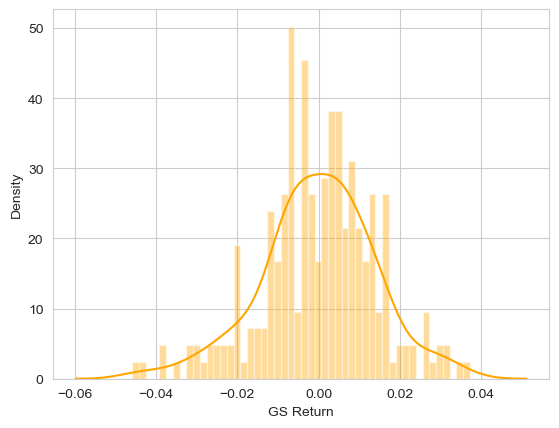

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['GS Return'], color='orange', bins=50)

##### 3.2.2.4. JPM

<Axes: xlabel='JPM Return', ylabel='Density'>

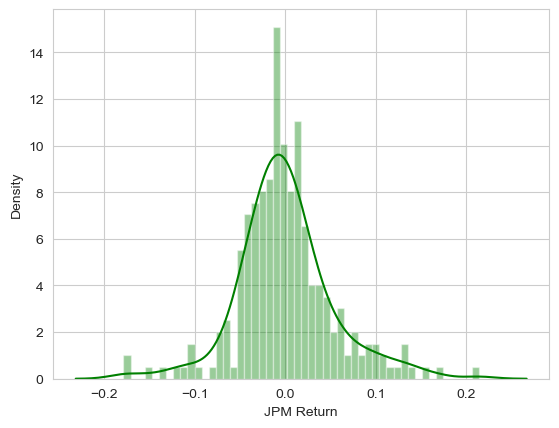

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['JPM Return'], color='green', bins=50)

<Axes: xlabel='JPM Return', ylabel='Density'>

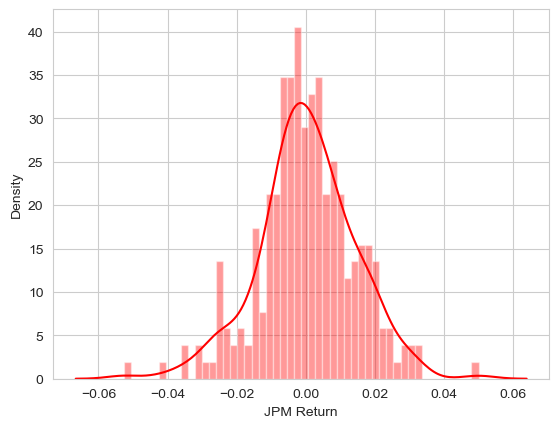

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['JPM Return'], color='red', bins=50)

##### 3.2.2.5. MS

<Axes: xlabel='MS Return', ylabel='Density'>

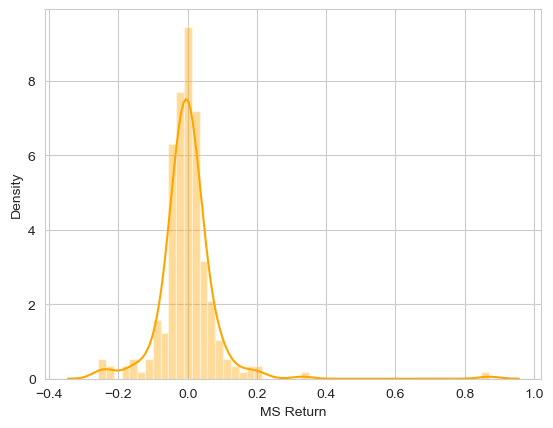

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS Return'], color='orange', bins=50)

<Axes: xlabel='MS Return', ylabel='Density'>

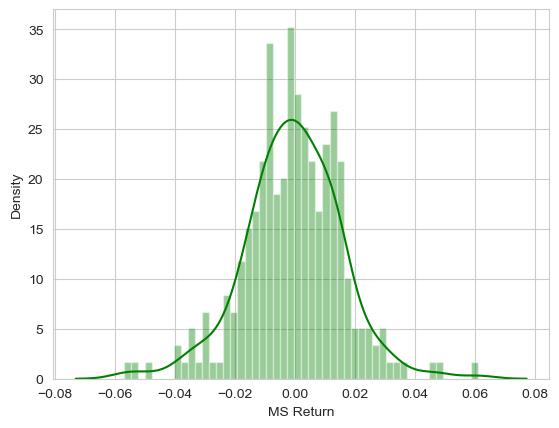

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

##### 3.2.2.6. WFC

<Axes: xlabel='WFC Return', ylabel='Density'>

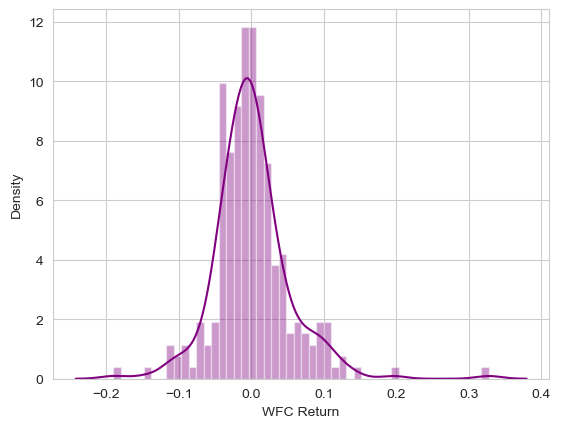

In [ ]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['WFC Return'], color='purple', bins=50)

<Axes: xlabel='WFC Return', ylabel='Density'>

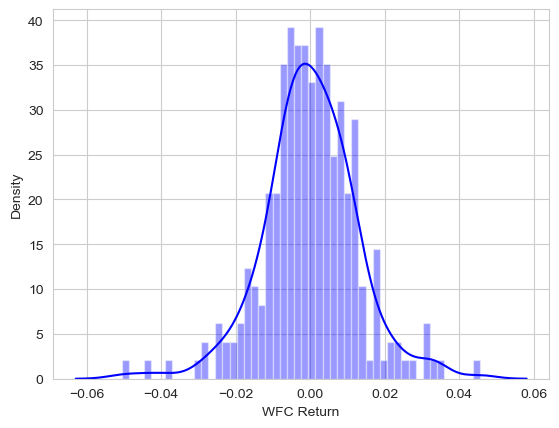

In [ ]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['WFC Return'], color='blue', bins=50)

#### 3.2.3 Correlation between bank’s stock returns

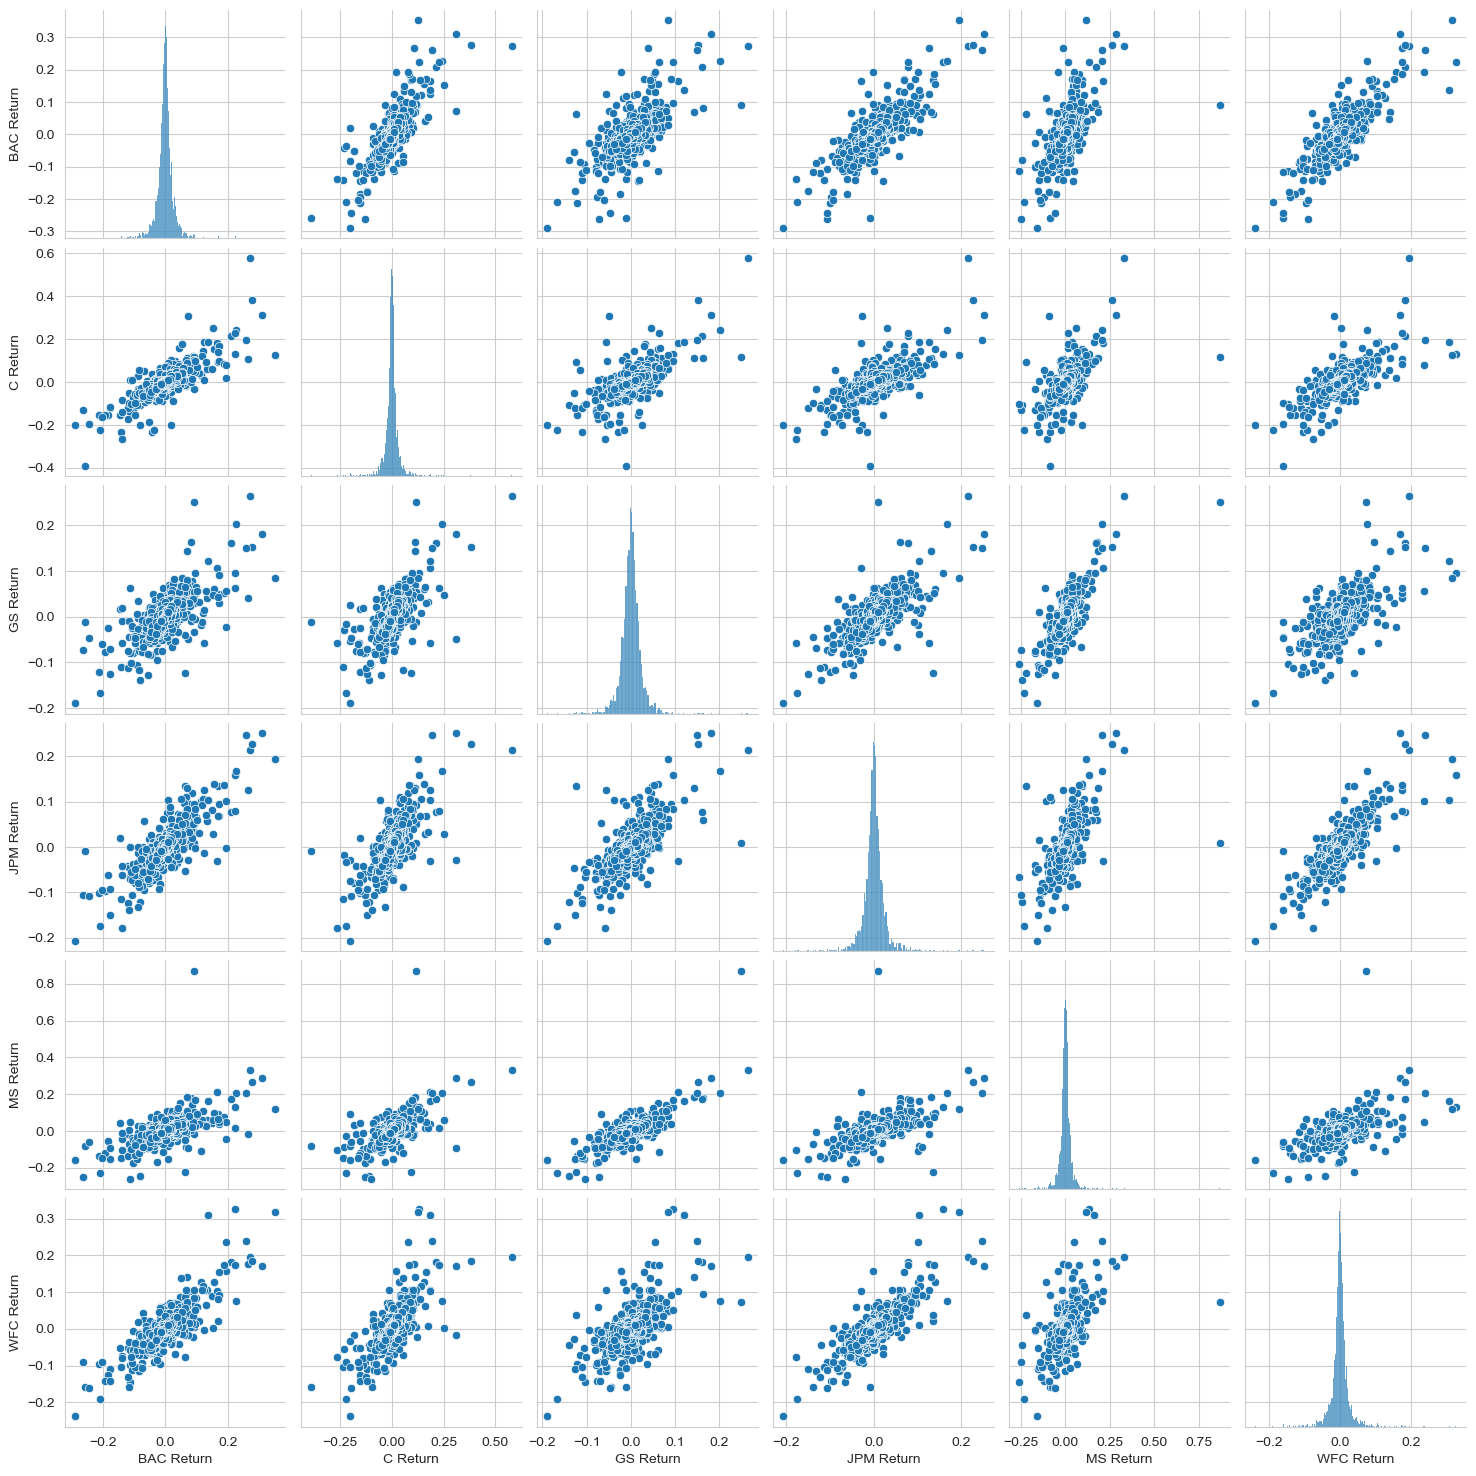

In [ ]:
sns.pairplot(data=returns)

### 3.3. Optional visualization
#### 3.3.1. Candle plot visualization

In [ ]:
import cufflinks as cf
import plotly.offline as offline
cf.go_offline()
bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].head()

Stock Info,Open,High,Low,Close
Date,,,,
2015-01-02,17.99,18.03,17.68,17.90
2015-01-05,17.79,17.81,17.29,17.38
2015-01-06,17.42,17.44,16.78,16.86
2015-01-07,17.14,17.18,16.87,16.94
2015-01-08,17.16,17.34,17.10,17.29


In [ ]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle',title='BAC')

In [ ]:
bank_stocks['C'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle', title ='C')

In [ ]:
bank_stocks['GS'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle',title='GS')

In [ ]:
bank_stocks['JPM'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle',title='JPM')

In [ ]:
bank_stocks['MS'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle',title='MS')

In [ ]:
bank_stocks['WFC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind = 'candle',title='WFC')

#### 3.3.2. Simple moving averages (SMAs) visualization

In [ ]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [ ]:
bank_stocks['C']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [ ]:
bank_stocks['GS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [ ]:
bank_stocks['JPM']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [ ]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [ ]:
bank_stocks['WFC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods = [13, 21, 55])